In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Normalize the data and reshape for CNN
train_x = train_x.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_x = test_x.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [4]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
# Train the model
model.fit(train_x, train_y, epochs=5, validation_split=0.2)


Epoch 1/5


1500/1500 [==============================] - 11s 7ms/step - loss: 0.4847 - accuracy: 0.8220 - val_loss: 0.3533 - val_accuracy: 0.8688
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3238 - accuracy: 0.8829 - val_loss: 0.3133 - val_accuracy: 0.8823
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2768 - accuracy: 0.8974 - val_loss: 0.2778 - val_accuracy: 0.8985
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2433 - accuracy: 0.9094 - val_loss: 0.2609 - val_accuracy: 0.9047
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2176 - accuracy: 0.9189 - val_loss: 0.2742 - val_accuracy: 0.9013


In [8]:
# Evaluate the model
loss, acc = model.evaluate(test_x, test_y)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.8964
Test Loss: 0.28370001912117004
Test Accuracy: 0.896399974822998


In [9]:
# Label map for predictions
label_names = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']


In [10]:
# Predict and visualize results
def predict(id_):
    prediction = model.predict(test_x[id_:id_+1])
    predicted_label = label_names[np.argmax(prediction)]
    print("Predicted:", predicted_label)
    plt.imshow(test_x[id_].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 96ms/step
Predicted: coat


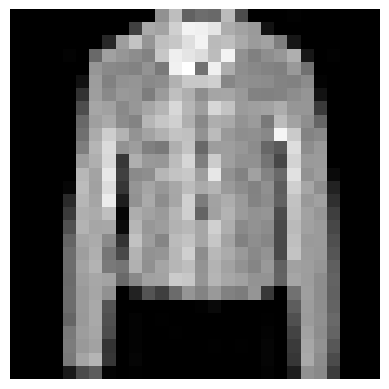

1/1 [==============================] - 0s 21ms/step
Predicted: sandal


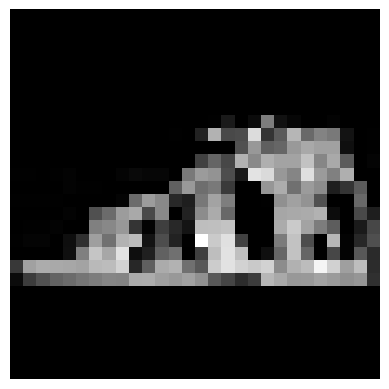

1/1 [==============================] - 0s 20ms/step
Predicted: sneaker


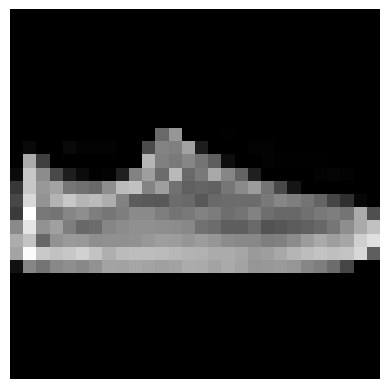

1/1 [==============================] - 0s 18ms/step
Predicted: dress


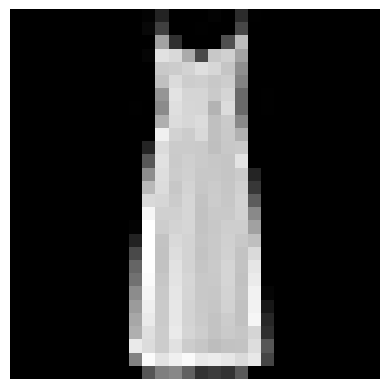

1/1 [==============================] - 0s 21ms/step
Predicted: coat


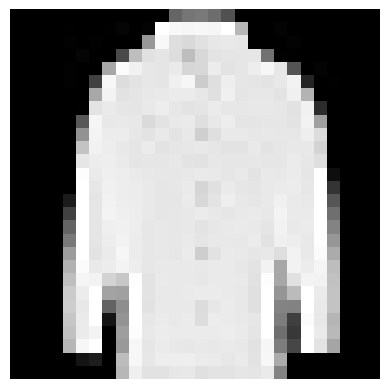

1/1 [==============================] - 0s 25ms/step
Predicted: trouser


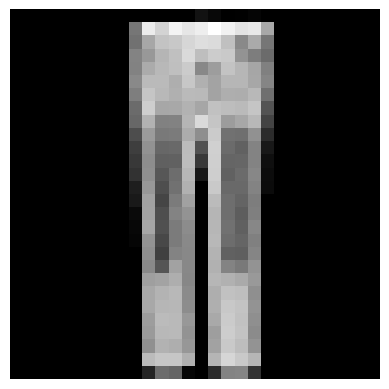

1/1 [==============================] - 0s 22ms/step
Predicted: pullover


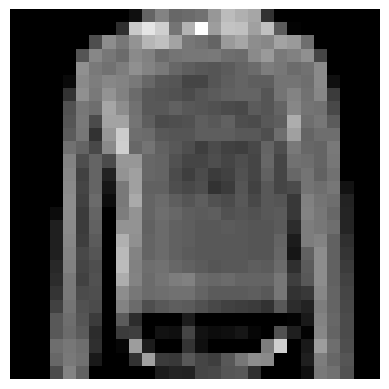

1/1 [==============================] - 0s 17ms/step
Predicted: coat


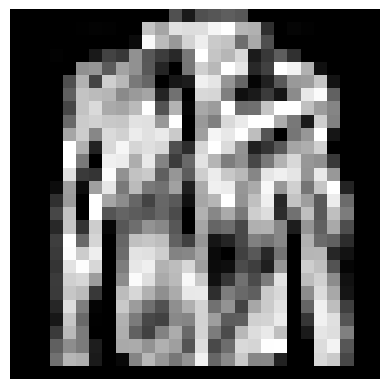

1/1 [==============================] - 0s 19ms/step
Predicted: bag


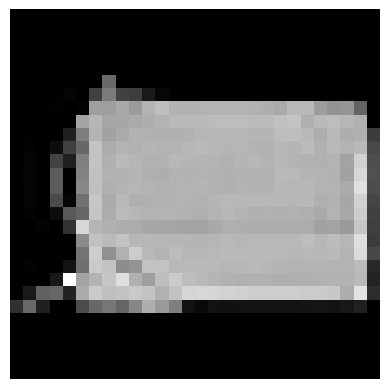

1/1 [==============================] - 0s 19ms/step
Predicted: t_shirt


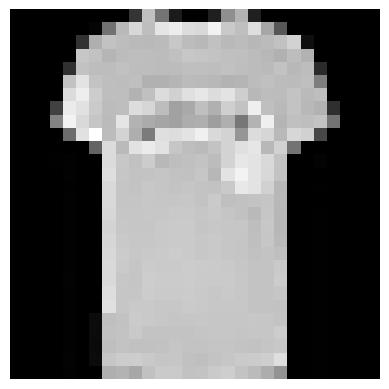

In [11]:
# Test prediction
for i in range(10, 20):
    predict(i)